# ***Введение в логистическую регрессию***

## Логистическая регрессия работает на основе предсказания вероятности принадлежности объекта к одному из двух классов. Основной механизм, который она использует для связи с вероятностью, — это ***логистическая (сигмоидная) функция***.

$$\Large \sigma(z) = \frac{1}{1 + e^{-z}}$$


## Почему линейная регрессия не может решать задачу классификации?

# ***Простейшая реализация логистической регрессии в питоне***

## О датафрейме:
Описание датасета Pima Indians Diabetes, датасет содержит 768 записей и 8 признаков, среди которых:

1. `Pregnancies` — количество беременностей.
2. `Glucose` — уровень глюкозы в крови.
3. `BloodPressure` — диастолическое артериальное давление (в мм рт. ст.).
4. `SkinThickness` — толщина кожной складки (в мм).
5. `Insulin` — уровень инсулина в крови (мед/дл).
6. `BMI` — индекс массы тела (кг/м²).
7. `DiabetesPedigreeFunction` — функция родословной диабета (0-1).
8. `Age` — возраст (в годах).
9. `Outcome` — наличие диабета (1 — да, 0 — нет).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)
# Замена 0 в признаках на NaN для корректной обработки пропусков
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Заполнение NaN средними значениями
data.fillna(data.mean(), inplace=True)


X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Дополнительные метрики
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



Заметим, что без дополнительных вмешательств в модель, наша точность оказывается `0.75`

Вопросы:
- **Как вы думаете, чего не хватает для полноценной оценки модели?**
- **Как можно улучшить этот код? Например, стоит ли добавить кросс-валидацию?**

# ***Математическая основа***

## ***Основная идея***

Логистическая регрессия использует **сигмоидную функцию** для преобразования линейной комбинации признаков в вероятность, которая находится в диапазоне от 0 до 1.  

## ***Интерпретация***

- Если результат функции $\sigma(z)$ больше 0.5, объект классифицируется как принадлежащий к классу 1; если меньше — к классу 0.
- Модель предоставляет вероятностную оценку, что позволяет принимать более обоснованные решения на основе предсказаний.

Вопрос: **Как выглядит график сигмоидной функции?**

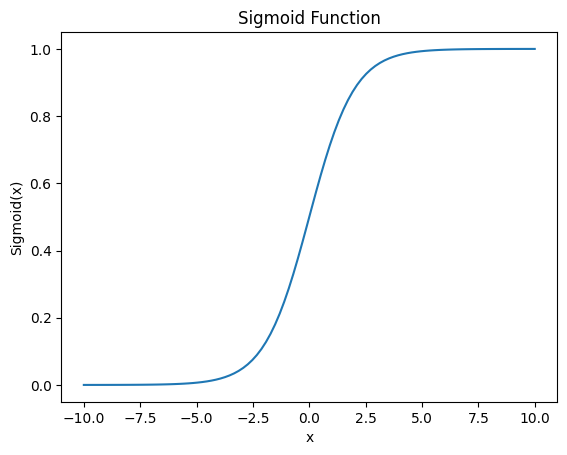

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.show()


# ***Переобучение и недообучение***

**Регуляризация** — это метод, который помогает предотвратить переобучение, добавляя штраф за сложность модели.

**L1-регуляризация (Lasso)**: Применяет штраф на сумму абсолютных значений коэффициентов. Это может привести к обнулению некоторых коэффициентов, что способствует уменьшению числа признаков и делает модель более интерпретируемой.

**L2-регуляризация (Ridge)**: Применяет штраф на сумму квадратов коэффициентов. Это помогает смягчить влияние признаков, которые могут быть шумными или малозначительными, и улучшает обобщающую способность модели.

### L1 Регуляризация (Lasso)
$$\Large \text{L1 Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|$$

### L2 Регуляризация (Ridge)

$$\Large \text{L2 Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2$$

Где:
- $y_i$ — истинные значения,
- $\hat{y}_i$ — предсказанные значения,
- $\lambda$ — коэффициент регуляризации.

In [ ]:
model_l2 = LogisticRegression(C=0.1)  # Регуляризация L2
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print(f'Accuracy with L2 regularization: {accuracy_score(y_test, y_pred_l2)}')

Accuracy with L2 regularization: 0.7792207792207793


Заметим, что наша точность **поднялась**!

Вопрос: Какие метрики (**кроме accuracy**) можно использовать, чтобы убедиться, что модель **не переобучается**?

# ***Проверка модели на адекватность***

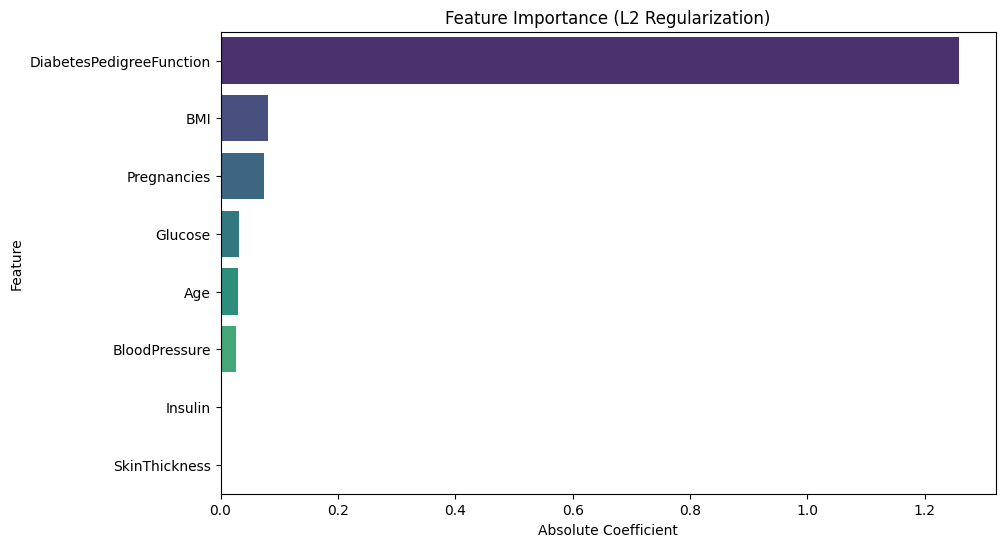

In [ ]:
import seaborn as sns
feature_names = X_train.columns
coef = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_l2.coef_[0]
})

# Сортировка по абсолютным значениям коэффициентов
coef['Absolute Coefficient'] = coef['Coefficient'].abs()
coef_sorted = coef.sort_values(by='Absolute Coefficient', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=coef_sorted, palette='viridis')
plt.title('Feature Importance (L2 Regularization)')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

Вопрос:
- Если один из коэффициентов **очень большой**, о чём это может говорить?
- Какие признаки оказывают **наибольшее влияние** на результат модели?
- Как можно проверить, **переоценивает** ли модель важность какого-то признака?